# Running a baroclinic instability test case

First we set up the mpi environment:

In [1]:
import ipyparallel as ipp
ntiles = 6
layout = (1, 1)

num_ranks = ntiles * layout[0] * layout[1]
cluster = ipp.Cluster(engines="mpi", n=num_ranks).start_and_connect_sync()

# start executing cells on the workers in parallel from here on
%autopx

Starting 6 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>
100%|█████████████████████████████████████████| 6/6 [00:05<00:00,  1.06engine/s]
%autopx enabled


Double-check the MPI setup:

In [2]:
from mpi4py import MPI

mpi_comm = MPI.COMM_WORLD
mpi_size = mpi_comm.Get_size()
mpi_rank = mpi_comm.Get_rank()

print(f"I am MPI-rank {mpi_rank} of a total of {mpi_size}")

[stdout:0] I am MPI-rank 0 of a total of 6


[stdout:2] I am MPI-rank 2 of a total of 6


[stdout:1] I am MPI-rank 1 of a total of 6


[stdout:3] I am MPI-rank 3 of a total of 6


[stdout:4] I am MPI-rank 4 of a total of 6


[stdout:5] I am MPI-rank 5 of a total of 6


Next we set up the model driver using the yaml config file:

In [ ]:
#%%capture

from pace.driver.run import Driver, DriverConfig
import yaml

config_file = "baroclinic_c20.yaml"

with open(config_file, "r") as f:
    driver_config = DriverConfig.from_dict(yaml.safe_load(f))
driver = Driver(config=driver_config)

[output:2]

[output:3]

[output:4]

[output:1]

[output:0]

[output:5]

%px:   0%|                                             | 0/6 [00:00<?, ?tasks/s]

[stdout:5] 2024-01-22 15:37:20|INFO|rank 5|pace.util.logging:Constant selected: ConstantVersions.GFS
2024-01-22 15:37:20|INFO|rank 5|pace.util.logging:initializing driver
2024-01-22 15:37:20|INFO|rank 5|pace.util.logging:setting up grid started
2024-01-22 15:37:20|INFO|rank 5|pace.util.logging:setting up grid done
2024-01-22 15:37:20|INFO|rank 5|pace.util.logging:setting up state started
2024-01-22 15:37:21|INFO|rank 5|pace.util.logging:setting up state done
2024-01-22 15:37:21|INFO|rank 5|pace.util.logging:setting up dycore object started


[stdout:1] 2024-01-22 15:37:20|INFO|rank 1|pace.util.logging:Constant selected: ConstantVersions.GFS
2024-01-22 15:37:20|INFO|rank 1|pace.util.logging:initializing driver
2024-01-22 15:37:20|INFO|rank 1|pace.util.logging:setting up grid started
2024-01-22 15:37:20|INFO|rank 1|pace.util.logging:setting up grid done
2024-01-22 15:37:20|INFO|rank 1|pace.util.logging:setting up state started
2024-01-22 15:37:21|INFO|rank 1|pace.util.logging:setting up state done
2024-01-22 15:37:21|INFO|rank 1|pace.util.logging:setting up dycore object started


[stdout:3] 2024-01-22 15:37:20|INFO|rank 3|pace.util.logging:Constant selected: ConstantVersions.GFS
2024-01-22 15:37:20|INFO|rank 3|pace.util.logging:initializing driver
2024-01-22 15:37:20|INFO|rank 3|pace.util.logging:setting up grid started
2024-01-22 15:37:20|INFO|rank 3|pace.util.logging:setting up grid done
2024-01-22 15:37:20|INFO|rank 3|pace.util.logging:setting up state started
2024-01-22 15:37:22|INFO|rank 3|pace.util.logging:setting up state done
2024-01-22 15:37:22|INFO|rank 3|pace.util.logging:setting up dycore object started


[stdout:0] 2024-01-22 15:37:20|INFO|rank 0|pace.util.logging:Constant selected: ConstantVersions.GFS
2024-01-22 15:37:20|INFO|rank 0|pace.util.logging:initializing driver
2024-01-22 15:37:20|INFO|rank 0|pace.util.logging:setting up grid started
2024-01-22 15:37:20|INFO|rank 0|pace.util.logging:setting up grid done
2024-01-22 15:37:20|INFO|rank 0|pace.util.logging:setting up state started
2024-01-22 15:37:21|INFO|rank 0|pace.util.logging:setting up state done
2024-01-22 15:37:21|INFO|rank 0|pace.util.logging:setting up dycore object started


[stdout:2] 2024-01-22 15:37:20|INFO|rank 2|pace.util.logging:Constant selected: ConstantVersions.GFS
2024-01-22 15:37:20|INFO|rank 2|pace.util.logging:initializing driver
2024-01-22 15:37:20|INFO|rank 2|pace.util.logging:setting up grid started
2024-01-22 15:37:20|INFO|rank 2|pace.util.logging:setting up grid done
2024-01-22 15:37:20|INFO|rank 2|pace.util.logging:setting up state started
2024-01-22 15:37:21|INFO|rank 2|pace.util.logging:setting up state done
2024-01-22 15:37:21|INFO|rank 2|pace.util.logging:setting up dycore object started


[stdout:4] 2024-01-22 15:37:20|INFO|rank 4|pace.util.logging:Constant selected: ConstantVersions.GFS
2024-01-22 15:37:20|INFO|rank 4|pace.util.logging:initializing driver
2024-01-22 15:37:20|INFO|rank 4|pace.util.logging:setting up grid started
2024-01-22 15:37:20|INFO|rank 4|pace.util.logging:setting up grid done
2024-01-22 15:37:20|INFO|rank 4|pace.util.logging:setting up state started
2024-01-22 15:37:21|INFO|rank 4|pace.util.logging:setting up state done
2024-01-22 15:37:21|INFO|rank 4|pace.util.logging:setting up dycore object started


%px:   0%|                                             | 0/6 [00:01<?, ?tasks/s]

[stderr:5] /usr/local/lib/python3.8/dist-packages/pace/util/grid/gnomonic.py:682: RuntimeWarning: invalid value encountered in true_divide
  np.sum(p * q, axis=-1)


[stderr:2] /usr/local/lib/python3.8/dist-packages/pace/util/grid/gnomonic.py:682: RuntimeWarning: invalid value encountered in true_divide
  np.sum(p * q, axis=-1)


%px:   0%|                                             | 0/6 [00:09<?, ?tasks/s]

In [ ]:
if mpi_rank == 0:
    print(driver.state.grid_data.lon_agrid.shape)

We can inspect the initial model state:

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs
from fv3viz import pcolormesh_cube
from pace.util import CubedSphereCommunicator

communicator = CubedSphereCommunicator.from_layout(
    comm=driver.comm,
    layout=driver.config.layout,
)
u_wind = communicator.gather(driver.state.dycore_state.u)
temperature = communicator.gather(driver.state.dycore_state.pt)
surface_pressure = communicator.gather(driver.state.dycore_state.ps)
grid_lon = communicator.gather(driver.state.grid_data.lon)
grid_lat = communicator.gather(driver.state.grid_data.lat)
a_lon = communicator.gather(driver.state.grid_data.lon_agrid)
a_lat = communicator.gather(driver.state.grid_data.lat_agrid)

[output:0]

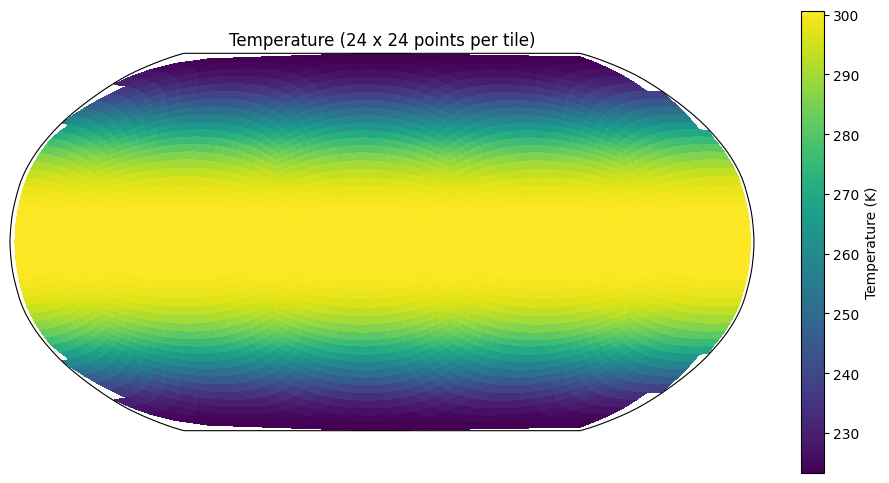

[output:0]

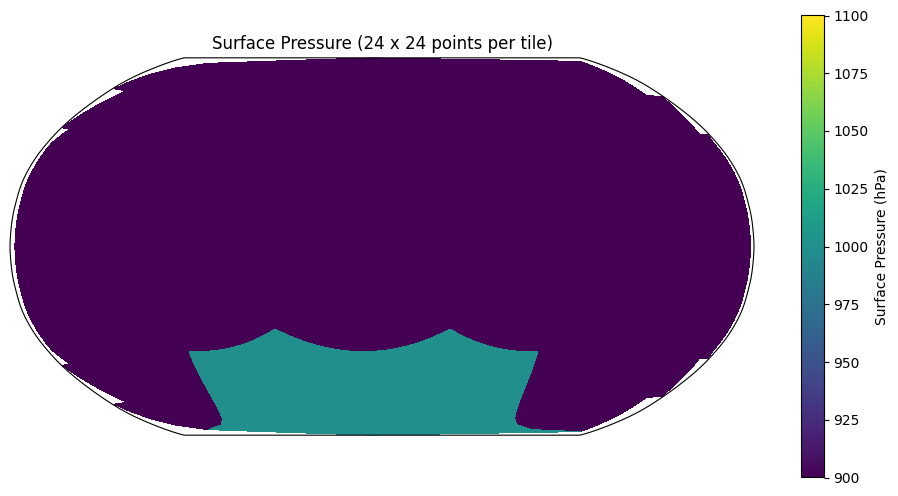

[output:0]

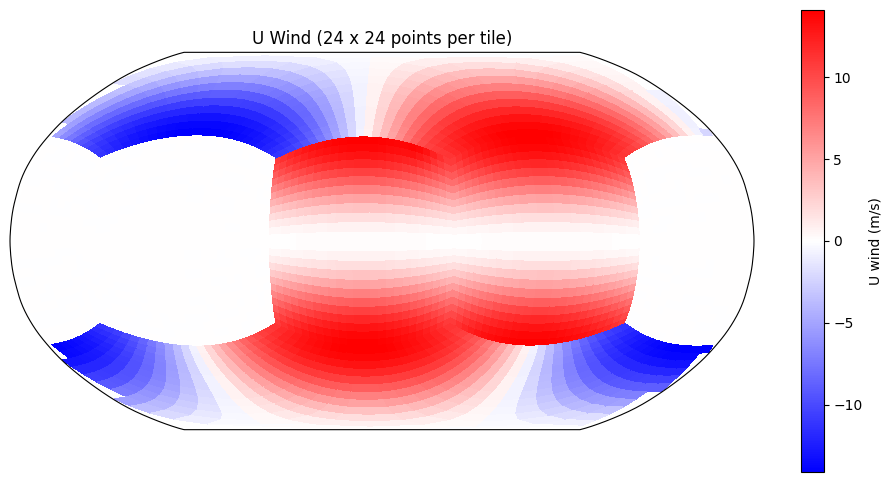

In [7]:
if mpi_rank == 0:
    u_mean = 0.5 * (u_wind.data[:,:,:-1, :] + u_wind.data[:,:, 1:, :])
    
    nx = temperature.shape[1]
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection=ccrs.Robinson())
    f1 = pcolormesh_cube(
        grid_lat.data * 180./np.pi,
        grid_lon.data * 180./np.pi,
        temperature.data[:, :, :, 65],
        cmap="viridis",
    )
    plt.colorbar(f1, label="Temperature (K)")
    ax.set_title(f"Temperature ({nx} x {nx} points per tile)")
    
#     fig = plt.figure(figsize=(12, 6))
#     ax = fig.add_subplot(111, projection=ccrs.Robinson())
#     f1 = pcolormesh_cube(
#         grid_lat.data * 180./np.pi,
#         grid_lon.data * 180./np.pi,
#         surface_pressure.data[:, :, :]/100.,
#         cmap="viridis",
#     )
#     plt.colorbar(f1, label="Surface Pressure (hPa)")
#     ax.set_title(f"Surface Pressure ({nx} x {nx} points per tile)")
    
    
#     fig = plt.figure(figsize=(12, 6))
#     ax = fig.add_subplot(111, projection=ccrs.Robinson())
#     f1 = pcolormesh_cube(
#         grid_lat.data * 180./np.pi,
#         grid_lon.data * 180./np.pi,
#         u_mean[:,:,:,65],
#         cmap="bwr",
#     )
#     plt.colorbar(f1, label="U wind (m/s)")
#     ax.set_title(f"U Wind ({nx} x {nx} points per tile)")

And then we can run the model:

In [8]:
try:
    driver.step_all()
finally:
    driver.cleanup()

[stdout:1] 2024-01-21 04:04:04|INFO|rank 1|pace.util.logging:integrating driver forward in time
2024-01-21 04:04:09|INFO|rank 1|pace.util.logging:Finished stepping 0
2024-01-21 04:04:09|INFO|rank 1|pace.util.logging:diagnostics for step 2000-01-01 00:03:45 started
2024-01-21 04:04:09|INFO|rank 1|pace.util.logging:diagnostics for step 2000-01-01 00:03:45 finished
2024-01-21 04:04:13|INFO|rank 1|pace.util.logging:Finished stepping 1
2024-01-21 04:04:13|INFO|rank 1|pace.util.logging:diagnostics for step 2000-01-01 00:07:30 started
2024-01-21 04:04:13|INFO|rank 1|pace.util.logging:diagnostics for step 2000-01-01 00:07:30 finished
2024-01-21 04:04:16|INFO|rank 1|pace.util.logging:Finished stepping 2
2024-01-21 04:04:16|INFO|rank 1|pace.util.logging:diagnostics for step 2000-01-01 00:11:15 started
2024-01-21 04:04:16|INFO|rank 1|pace.util.logging:diagnostics for step 2000-01-01 00:11:15 finished
2024-01-21 04:04:19|INFO|rank 1|pace.util.logging:Finished stepping 3
2024-01-21 04:04:19|INFO|ra

[stdout:3] 2024-01-21 04:04:04|INFO|rank 3|pace.util.logging:integrating driver forward in time
2024-01-21 04:04:09|INFO|rank 3|pace.util.logging:Finished stepping 0
2024-01-21 04:04:09|INFO|rank 3|pace.util.logging:diagnostics for step 2000-01-01 00:03:45 started
2024-01-21 04:04:09|INFO|rank 3|pace.util.logging:diagnostics for step 2000-01-01 00:03:45 finished
2024-01-21 04:04:13|INFO|rank 3|pace.util.logging:Finished stepping 1
2024-01-21 04:04:13|INFO|rank 3|pace.util.logging:diagnostics for step 2000-01-01 00:07:30 started
2024-01-21 04:04:13|INFO|rank 3|pace.util.logging:diagnostics for step 2000-01-01 00:07:30 finished
2024-01-21 04:04:16|INFO|rank 3|pace.util.logging:Finished stepping 2
2024-01-21 04:04:16|INFO|rank 3|pace.util.logging:diagnostics for step 2000-01-01 00:11:15 started
2024-01-21 04:04:16|INFO|rank 3|pace.util.logging:diagnostics for step 2000-01-01 00:11:15 finished
2024-01-21 04:04:19|INFO|rank 3|pace.util.logging:Finished stepping 3
2024-01-21 04:04:19|INFO|ra

[stdout:5] 2024-01-21 04:04:04|INFO|rank 5|pace.util.logging:integrating driver forward in time
2024-01-21 04:04:09|INFO|rank 5|pace.util.logging:Finished stepping 0
2024-01-21 04:04:09|INFO|rank 5|pace.util.logging:diagnostics for step 2000-01-01 00:03:45 started
2024-01-21 04:04:09|INFO|rank 5|pace.util.logging:diagnostics for step 2000-01-01 00:03:45 finished
2024-01-21 04:04:13|INFO|rank 5|pace.util.logging:Finished stepping 1
2024-01-21 04:04:13|INFO|rank 5|pace.util.logging:diagnostics for step 2000-01-01 00:07:30 started
2024-01-21 04:04:13|INFO|rank 5|pace.util.logging:diagnostics for step 2000-01-01 00:07:30 finished
2024-01-21 04:04:16|INFO|rank 5|pace.util.logging:Finished stepping 2
2024-01-21 04:04:16|INFO|rank 5|pace.util.logging:diagnostics for step 2000-01-01 00:11:15 started
2024-01-21 04:04:16|INFO|rank 5|pace.util.logging:diagnostics for step 2000-01-01 00:11:15 finished
2024-01-21 04:04:19|INFO|rank 5|pace.util.logging:Finished stepping 3
2024-01-21 04:04:19|INFO|ra

[stdout:4] 2024-01-21 04:04:04|INFO|rank 4|pace.util.logging:integrating driver forward in time
2024-01-21 04:04:09|INFO|rank 4|pace.util.logging:Finished stepping 0
2024-01-21 04:04:09|INFO|rank 4|pace.util.logging:diagnostics for step 2000-01-01 00:03:45 started
2024-01-21 04:04:09|INFO|rank 4|pace.util.logging:diagnostics for step 2000-01-01 00:03:45 finished
2024-01-21 04:04:13|INFO|rank 4|pace.util.logging:Finished stepping 1
2024-01-21 04:04:13|INFO|rank 4|pace.util.logging:diagnostics for step 2000-01-01 00:07:30 started
2024-01-21 04:04:13|INFO|rank 4|pace.util.logging:diagnostics for step 2000-01-01 00:07:30 finished
2024-01-21 04:04:16|INFO|rank 4|pace.util.logging:Finished stepping 2
2024-01-21 04:04:16|INFO|rank 4|pace.util.logging:diagnostics for step 2000-01-01 00:11:15 started
2024-01-21 04:04:16|INFO|rank 4|pace.util.logging:diagnostics for step 2000-01-01 00:11:15 finished
2024-01-21 04:04:19|INFO|rank 4|pace.util.logging:Finished stepping 3
2024-01-21 04:04:19|INFO|ra

[stdout:2] 2024-01-21 04:04:04|INFO|rank 2|pace.util.logging:integrating driver forward in time
2024-01-21 04:04:09|INFO|rank 2|pace.util.logging:Finished stepping 0
2024-01-21 04:04:09|INFO|rank 2|pace.util.logging:diagnostics for step 2000-01-01 00:03:45 started
2024-01-21 04:04:09|INFO|rank 2|pace.util.logging:diagnostics for step 2000-01-01 00:03:45 finished
2024-01-21 04:04:13|INFO|rank 2|pace.util.logging:Finished stepping 1
2024-01-21 04:04:13|INFO|rank 2|pace.util.logging:diagnostics for step 2000-01-01 00:07:30 started
2024-01-21 04:04:13|INFO|rank 2|pace.util.logging:diagnostics for step 2000-01-01 00:07:30 finished
2024-01-21 04:04:16|INFO|rank 2|pace.util.logging:Finished stepping 2
2024-01-21 04:04:16|INFO|rank 2|pace.util.logging:diagnostics for step 2000-01-01 00:11:15 started
2024-01-21 04:04:16|INFO|rank 2|pace.util.logging:diagnostics for step 2000-01-01 00:11:15 finished
2024-01-21 04:04:19|INFO|rank 2|pace.util.logging:Finished stepping 3
2024-01-21 04:04:19|INFO|ra

[stdout:0] 2024-01-21 04:04:04|INFO|rank 0|pace.util.logging:integrating driver forward in time
2024-01-21 04:04:04|INFO|rank 0|pace.util.logging:FV Setup
2024-01-21 04:04:04|INFO|rank 0|pace.util.logging:Adjust pt
2024-01-21 04:04:04|INFO|rank 0|pace.util.logging:DynCore
2024-01-21 04:04:05|INFO|rank 0|pace.util.logging:TracerAdvection
2024-01-21 04:04:07|INFO|rank 0|pace.util.logging:Remapping
2024-01-21 04:04:09|INFO|rank 0|pace.util.logging:Omega
2024-01-21 04:04:09|INFO|rank 0|pace.util.logging:Del2Cubed
2024-01-21 04:04:09|INFO|rank 0|pace.util.logging:Neg Adj 3
2024-01-21 04:04:09|INFO|rank 0|pace.util.logging:CubedToLatLon
2024-01-21 04:04:09|INFO|rank 0|pace.util.logging:Finished stepping 0
2024-01-21 04:04:09|INFO|rank 0|pace.util.logging:diagnostics for step 2000-01-01 00:03:45 started
2024-01-21 04:04:09|INFO|rank 0|pace.util.logging:diagnostics for step 2000-01-01 00:03:45 finished
2024-01-21 04:04:09|INFO|rank 0|pace.util.logging:FV Setup
2024-01-21 04:04:09|INFO|rank 0|p

%px: 100%|████████████████████████████████| 6/6 [15:08:55<00:00, 9089.18s/tasks]


Now let's investigate the model state

[output:0]

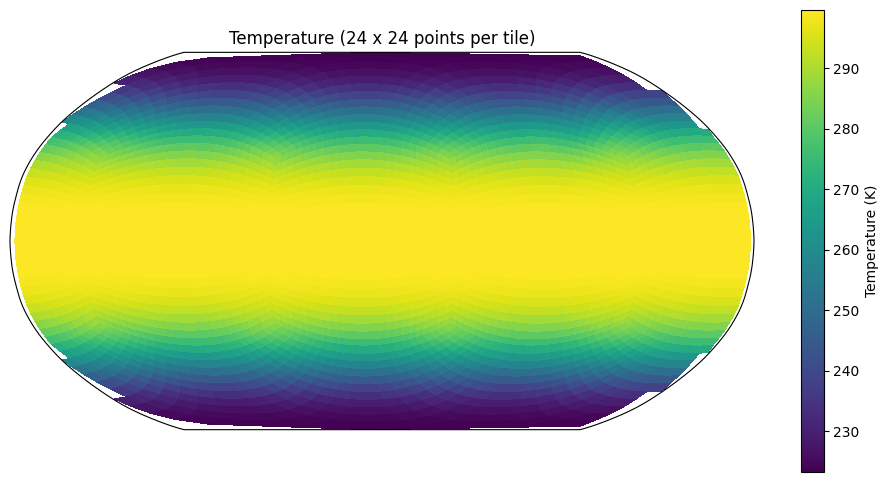

[output:0]

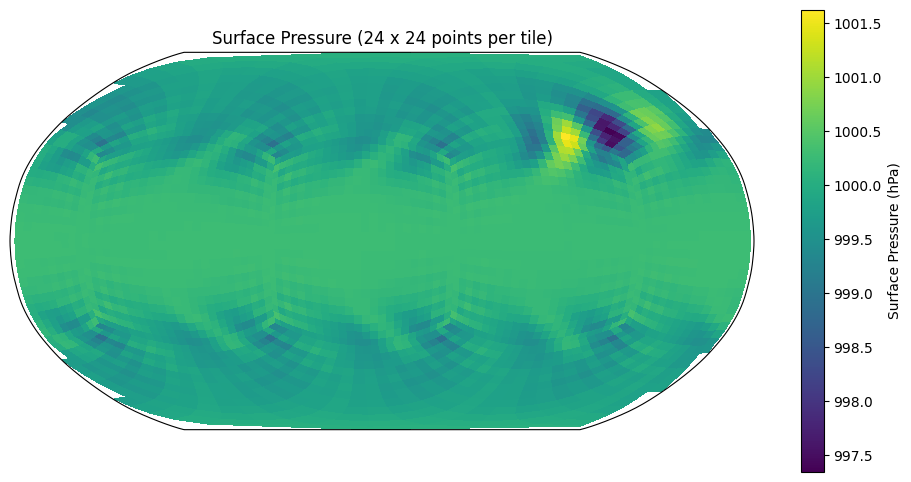

[output:0]

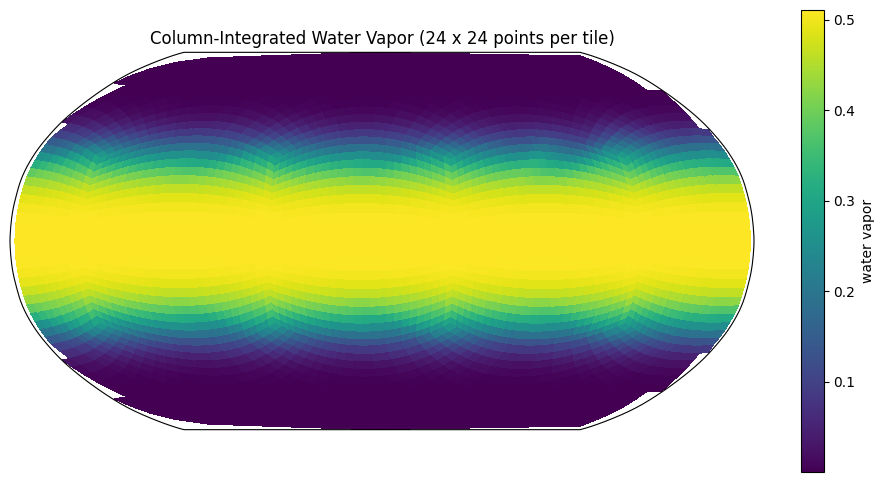

In [10]:
u_wind = communicator.gather(driver.state.dycore_state.u)
temperature = communicator.gather(driver.state.dycore_state.pt)
surface_pressure = communicator.gather(driver.state.dycore_state.ps)
grid_lon = communicator.gather(driver.state.grid_data.lon)
grid_lat = communicator.gather(driver.state.grid_data.lat)
a_lon = communicator.gather(driver.state.grid_data.lon_agrid)
a_lat = communicator.gather(driver.state.grid_data.lat_agrid)
qvap = communicator.gather(driver.state.dycore_state.qvapor)

if mpi_rank == 0:
    u_mean = 0.5 * (u_wind.data[:,:,:-1, :] + u_wind.data[:,:, 1:, :])
    column_qvap = np.sum(qvap, axis=3)
    
    nx = temperature.shape[1]
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection=ccrs.Robinson())
    f1 = pcolormesh_cube(
        grid_lat.data * 180./np.pi,
        grid_lon.data * 180./np.pi,
        temperature.data[:, :, :, 65],
        cmap="viridis",
    )
    plt.colorbar(f1, label="Temperature (K)")
    ax.set_title(f"Temperature ({nx} x {nx} points per tile)")
    
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection=ccrs.Robinson())
    f1 = pcolormesh_cube(
        grid_lat.data * 180./np.pi,
        grid_lon.data * 180./np.pi,
        surface_pressure.data[:, :, :]/100.,
        cmap="viridis",
    )
    plt.colorbar(f1, label="Surface Pressure (hPa)")
    ax.set_title(f"Surface Pressure ({nx} x {nx} points per tile)")
    
    
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection=ccrs.Robinson())
    f1 = pcolormesh_cube(
        grid_lat.data * 180./np.pi,
        grid_lon.data * 180./np.pi,
        column_qvap,
        cmap="viridis",
    )
    plt.colorbar(f1, label="water vapor")
    ax.set_title(f"Column-Integrated Water Vapor ({nx} x {nx} points per tile)")

In [13]:
%autopx

(6, 24, 24, 79)


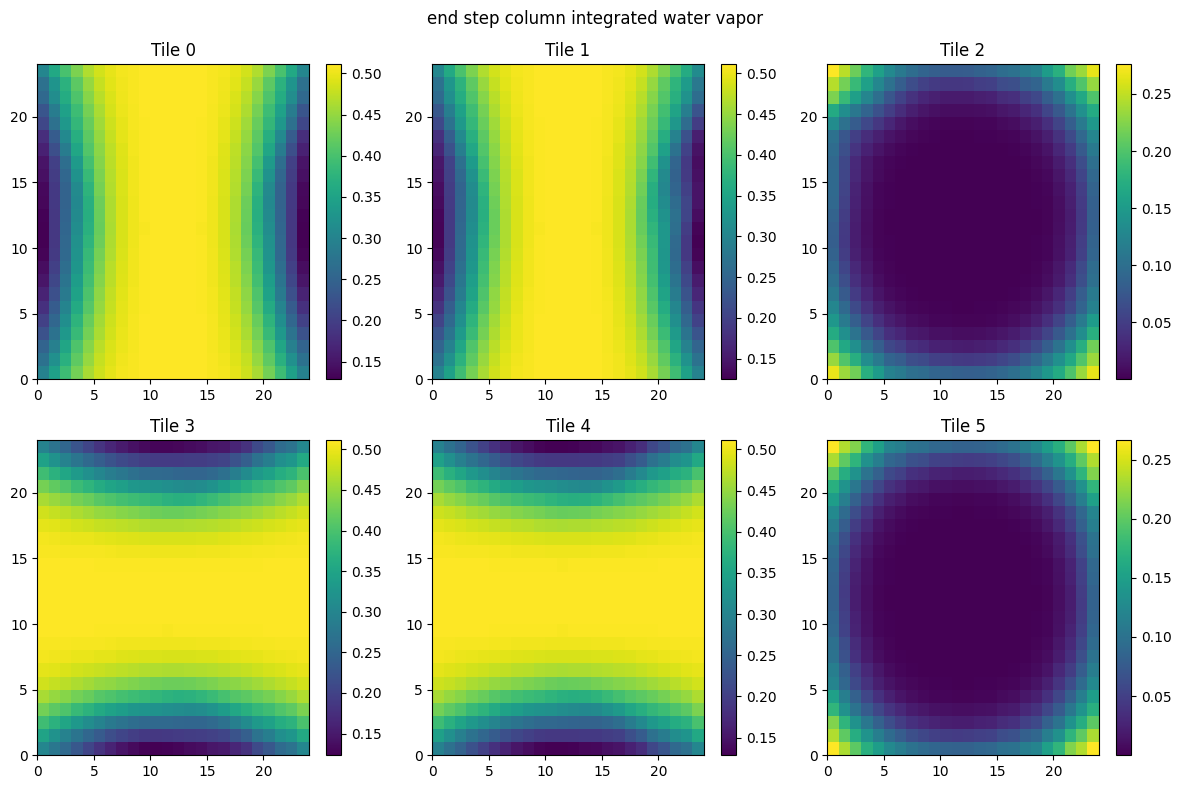

Text(0.5, 1.0, 'Column-Integrated Water Vapor (24 x 24 points per tile)')

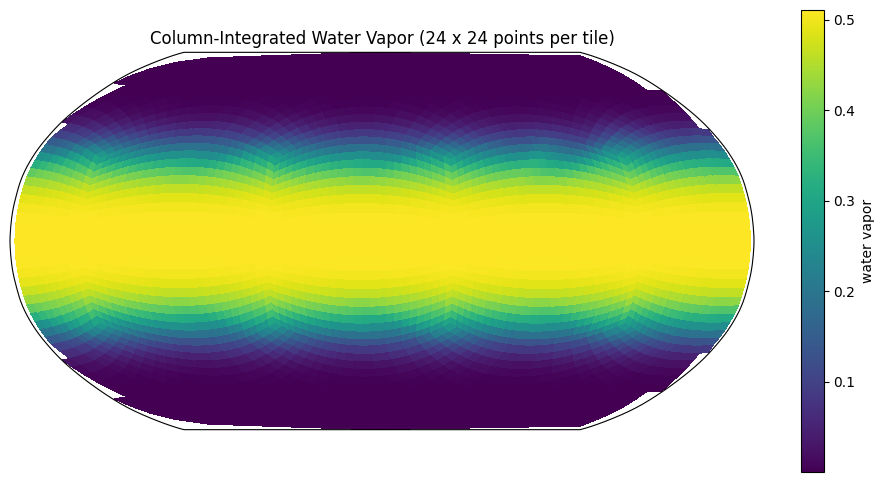

In [2]:
import xarray as xr
import zarr
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs
from fv3viz import pcolormesh_cube

ds = xr.open_zarr(store=zarr.DirectoryStore(path="output.zarr"), consolidated=False)

print(ds["qvapor"].isel(time=-1).values.shape)

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.flatten()
level = -1
varname = "qvapor"
for i in range(6):
    column_q = (
        np.sum(ds[varname].isel(time=-1, tile=i).values, axis=-1)
    )
    im = ax[i].pcolormesh(column_q)
    ax[i].set_title(f"Tile {i}")
    plt.colorbar(im, ax=ax[i])
fig.suptitle("end step column integrated water vapor")
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection=ccrs.Robinson())
f1 = pcolormesh_cube(
    ds["lat"].values * 180./np.pi,
    ds["lon"].values * 180./np.pi,
    np.sum(ds["qvapor"].isel(time=-1).values, axis=-1),
    cmap="viridis",
)
plt.colorbar(f1, label="water vapor")
ax.set_title(f"Column-Integrated Water Vapor ({24} x {24} points per tile)")